In [3]:
#Inportando bibliotecas
import pandas as pd

#Biblioteca Grafica
import matplotlib.pyplot as plt
import numpy as np

#Biblioteca Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


In [4]:
# carregar csv
df = pd.read_csv('banco_box_sintetico.csv')
df

,idade,renda_mensal,tempo_emprego,dividas_total,limite_cartao,historico_credito,num_cartoes_credito,num_emprestimos,atraso_pagamento,possui_imovel,possui_veiculo,cargo_atual,risco_credito
0,50,4145.83,1.4,5798,13957.29,1,1,1,0,Não,Não,Analista de TI,Médio
1,40,14080.13,0.9,39607,57549.72,1,0,2,0,Não,Não,Enfermeiro,Alto
2,59,7550.31,21.0,7865,20694.49,3,4,0,0,Não,Sim,Advogado,Médio
3,27,2390.01,5.6,1340,10593.18,17,5,3,0,Sim,Não,Analista de TI,Baixo
4,39,17135.27,20.3,45245,77949.94,1,3,2,0,Sim,Não,Contador,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,17133.71,10.4,36559,53726.07,7,3,0,0,Não,Não,Professor,Alto
996,82,8224.03,14.3,7642,18414.90,12,3,0,0,Sim,Não,Médico,Baixo
997,88,3286.20,19.1,1472,16055.81,12,0,1,0,Sim,Sim,Professor,Baixo
998,86,14855.40,26.6,42765,28284.90,6,3,0,0,Sim,Sim,Contador,Alto


In [5]:
df = df.dropna() ## remover os valores nulos
df

,idade,renda_mensal,tempo_emprego,dividas_total,limite_cartao,historico_credito,num_cartoes_credito,num_emprestimos,atraso_pagamento,possui_imovel,possui_veiculo,cargo_atual,risco_credito
0,50,4145.83,1.4,5798,13957.29,1,1,1,0,Não,Não,Analista de TI,Médio
1,40,14080.13,0.9,39607,57549.72,1,0,2,0,Não,Não,Enfermeiro,Alto
2,59,7550.31,21.0,7865,20694.49,3,4,0,0,Não,Sim,Advogado,Médio
3,27,2390.01,5.6,1340,10593.18,17,5,3,0,Sim,Não,Analista de TI,Baixo
4,39,17135.27,20.3,45245,77949.94,1,3,2,0,Sim,Não,Contador,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,17133.71,10.4,36559,53726.07,7,3,0,0,Não,Não,Professor,Alto
996,82,8224.03,14.3,7642,18414.90,12,3,0,0,Sim,Não,Médico,Baixo
997,88,3286.20,19.1,1472,16055.81,12,0,1,0,Sim,Sim,Professor,Baixo
998,86,14855.40,26.6,42765,28284.90,6,3,0,0,Sim,Sim,Contador,Alto


In [6]:
df = df.drop_duplicates() #duplicados
#df

In [7]:
#não temos duplicão

In [8]:
df["renda_mensal"] = pd.to_numeric(df["renda_mensal"], errors="coerce")
df["dividas_total"] = pd.to_numeric(df["dividas_total"], errors="coerce")
df


,idade,renda_mensal,tempo_emprego,dividas_total,limite_cartao,historico_credito,num_cartoes_credito,num_emprestimos,atraso_pagamento,possui_imovel,possui_veiculo,cargo_atual,risco_credito
0,50,4145.83,1.4,5798,13957.29,1,1,1,0,Não,Não,Analista de TI,Médio
1,40,14080.13,0.9,39607,57549.72,1,0,2,0,Não,Não,Enfermeiro,Alto
2,59,7550.31,21.0,7865,20694.49,3,4,0,0,Não,Sim,Advogado,Médio
3,27,2390.01,5.6,1340,10593.18,17,5,3,0,Sim,Não,Analista de TI,Baixo
4,39,17135.27,20.3,45245,77949.94,1,3,2,0,Sim,Não,Contador,Alto
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,17133.71,10.4,36559,53726.07,7,3,0,0,Não,Não,Professor,Alto
996,82,8224.03,14.3,7642,18414.90,12,3,0,0,Sim,Não,Médico,Baixo
997,88,3286.20,19.1,1472,16055.81,12,0,1,0,Sim,Sim,Professor,Baixo
998,86,14855.40,26.6,42765,28284.90,6,3,0,0,Sim,Sim,Contador,Alto


In [9]:
# Exemplo: transformar texto em minúsculo e sem espaços extras
df["cargo_atual"] = df["cargo_atual"].str.strip().str.lower()


In [10]:
df["relacao_divida/renda"] = (df["dividas_total"] / (df["renda_mensal"] + 1e-9))\
                               .replace([float("inf"), -float("inf")], None)
df

,idade,renda_mensal,tempo_emprego,dividas_total,limite_cartao,historico_credito,num_cartoes_credito,num_emprestimos,atraso_pagamento,possui_imovel,possui_veiculo,cargo_atual,risco_credito,relacao_divida/renda
0,50,4145.83,1.4,5798,13957.29,1,1,1,0,Não,Não,analista de ti,Médio,1.398514
1,40,14080.13,0.9,39607,57549.72,1,0,2,0,Não,Não,enfermeiro,Alto,2.812971
2,59,7550.31,21.0,7865,20694.49,3,4,0,0,Não,Sim,advogado,Médio,1.041679
3,27,2390.01,5.6,1340,10593.18,17,5,3,0,Sim,Não,analista de ti,Baixo,0.560667
4,39,17135.27,20.3,45245,77949.94,1,3,2,0,Sim,Não,contador,Alto,2.640460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,70,17133.71,10.4,36559,53726.07,7,3,0,0,Não,Não,professor,Alto,2.133747
996,82,8224.03,14.3,7642,18414.90,12,3,0,0,Sim,Não,médico,Baixo,0.929228
997,88,3286.20,19.1,1472,16055.81,12,0,1,0,Sim,Sim,professor,Baixo,0.447934
998,86,14855.40,26.6,42765,28284.90,6,3,0,0,Sim,Sim,contador,Alto,2.878751


In [11]:
df.to_csv("Banco_Box_limpo.csv", index=False)
print("Versão limpa salva com sucesso!")

Versão limpa salva com sucesso!


In [12]:
#graficos

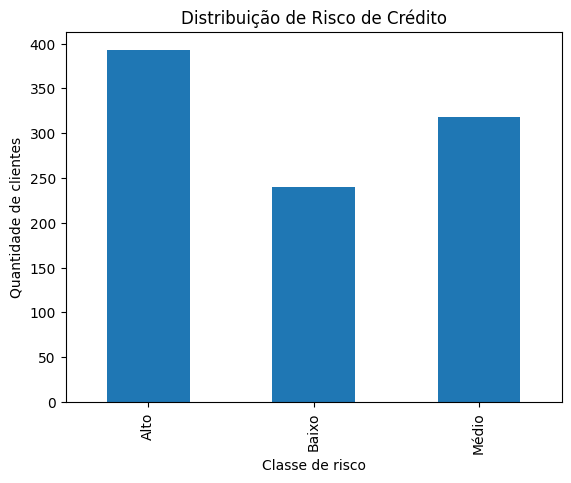

In [13]:
df["risco_credito"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribuição de Risco de Crédito")
plt.xlabel("Classe de risco")
plt.ylabel("Quantidade de clientes")
plt.show()

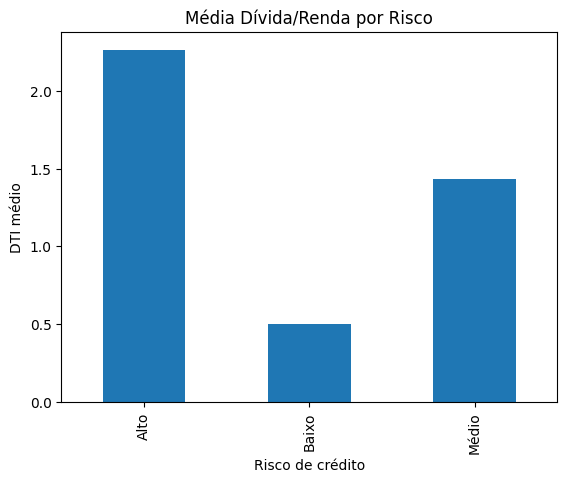

In [14]:
(df.groupby("risco_credito")["relacao_divida/renda"]
   .mean()
   .plot(kind="bar"))

plt.title("Média Dívida/Renda por Risco")
plt.xlabel("Risco de crédito")
plt.ylabel("DTI médio")
plt.show()

In [15]:
media_historica = np.mean(df["historico_credito"].to_numpy())
print(f"Média do histórico de crédito: {media_historica:.2f}")

Média do histórico de crédito: 9.92


In [16]:
# Map
map_simnao = {"sim": 1, "não": 0}

for col in ["possui_imovel", "possui_veiculo"]:
    if col in df.columns:
        df[col] = df[col].map(map_simnao).astype("float")


In [17]:
X = df.drop(columns=["risco_credito"])
y = df["risco_credito"]

In [18]:
# Definir colunas
categorical_features = ["cargo_atual"]
numerical_features = [c for c in X.columns if c not in categorical_features + ["possui_imovel", "possui_veiculo"]]
boolean_features = ["possui_imovel", "possui_veiculo"]

In [19]:
#Preparando para processamento
preprocess = ColumnTransformer([
    ("numerical", StandardScaler(), numerical_features),
    ("categorical", OneHotEncoder(handle_unknown="ignore"), categorical_features),
    ("boolean", "passthrough", boolean_features)
])

In [20]:
# Divisão entre treino e teste (forma mais enxuta)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [21]:
# Pipeline de pré-processamento + modelo
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

In [22]:
# Treinamento
pipe.fit(X_train, y_train)
# Predição
y_pred = pipe.predict(X_test)
# Avaliação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        Alto       1.00      1.00      1.00        79
       Baixo       0.92      1.00      0.96        48
       Médio       1.00      0.94      0.97        64

    accuracy                           0.98       191
   macro avg       0.97      0.98      0.98       191
weighted avg       0.98      0.98      0.98       191

